# Cleaning Outliers #

In order to get a celan data, we need to clean our data from outliers. \
The outliers of the global signal of each group (dyslexia,control) were identified in the notebook 'Scrubbing'. \
The 2 matrices 'control_outliers', 'dyslexia_outliers' contain the position of each outlier.

Next, we are going to clean all signals from outliers. import numpy as np
import pandas as pd 
import sys
import os
from glob import glob
import matplotlib.pyplot as plt


In [1]:
import numpy as np
import pandas as pd 
import sys
import os
from glob import glob
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

## 1. Import all data corrected after GSR ##


In [2]:
data_dirs = os.path.join('GSR', "*")
all_dirs = glob(data_dirs)

n = 115

GSR = np.zeros((264,850,n))
GSR_name = []
i=0

for a_dir in all_dirs:
    temp_data_df = np.loadtxt(a_dir)
    GSR[:,:,i] = temp_data_df
    splitted_file = a_dir.split(os.sep)
    name = splitted_file[1]
    GSR_name.append(name[:-20])
    i += 1
    

In [ ]:
print(GSR_name

['sub38', 'sub178', 'sub129', 'sub21', 'sub83', 'sub160', 'sub131', 'sub82', 'sub71', 'sub179', 'sub23', 'sub81', 'sub189', 'sub132', 'sub190', 'sub98', 'sub80', 'sub73', 'sub22', 'sub75', 'sub24', 'sub86', 'sub164', 'sub87', 'sub74', 'sub25', 'sub196', 'sub134', 'sub165', 'sub166', 'sub137', 'sub195', 'sub26', 'sub77', 'sub4', 'sub167', 'sub85', 'sub173', 'sub199', 'sub91', 'sub200', 'sub33', 'sub123', 'sub32', 'sub201', 'sub198', 'sub93', 'sub182', 'sub171', 'sub120', 'sub28', 'sub79', 'sub169', 'sub30', 'sub61', 'sub92', 'sub29', 'sub170', 'sub183', 'sub94', 'sub67', 'sub185', 'sub176', 'sub37', 'sub95', 'sub177', 'sub184', 'sub187', 'sub125', 'sub174', 'sub96', 'sub65', 'sub34', 'sub124', 'sub175', 'sub186', 'sub64', 'sub35', 'sub54', 'sub115', 'sub144', 'sub56', 'sub116', 'sub57', 'sub146', 'sub108', 'sub51', 'sub48', 'sub140', 'sub50', 'sub18', 'sub113', 'sub112', 'sub143', 'sub157', 'sub107', 'sub16', 'sub44', 'sub15', 'sub104', 'sub45', 'sub105', 'sub154', 'sub43', 'sub12', 'su

In [3]:
control_outliers = pd.read_pickle("control_outliers.pkl")
dyslexia_outliers = pd.read_pickle("dyslexia_outliers.pkl")
outliers = pd.concat([control_outliers,dyslexia_outliers])

Replacing all not-nan values to 1: 

In [4]:
outliers = outliers.where(~outliers.notna(), 1)
outliers

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
filename,,,,,,,,,,,,,,,,,,,,,
sub124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
sub177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sub184,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
sub83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Cleaning all outliers and creating correlation matrices ##
Now, we have GSR [ROI = 264 , TimeSeries = 850 , patients = 115]. \
We want to cut every outlier column in each patient by the position specified in 'outliers'. \
After cutting all outliers, we will create a correlation matrix [264,264] for every patient. 

In [5]:
correlation_mat = np.zeros((264,264,n))
for i in range (n):
    
    sub = GSR_name[i]  #the subject's number [string]
    sub_outliers = outliers.loc[sub] #the subject's outliers row
    sub_out_i = sub_outliers.index[sub_outliers ==1].tolist() #the subject's outliers column indices

    GSR_sub = GSR[:,:,i]
    GSR_sub = np.delete(GSR_sub,sub_out_i,1) #deleting columns with outliers
    print('The number of timeseries in ' + str(sub) + ' is ' + str(GSR_sub.shape[1]))
    correlation_mat[:,:,i] = np.corrcoef(GSR_sub)
    

The number of timeseries in sub38 is 835
The number of timeseries in sub178 is 800
The number of timeseries in sub129 is 845
The number of timeseries in sub21 is 831
The number of timeseries in sub83 is 836
The number of timeseries in sub160 is 789
The number of timeseries in sub131 is 829
The number of timeseries in sub82 is 821
The number of timeseries in sub71 is 837
The number of timeseries in sub179 is 817
The number of timeseries in sub23 is 844
The number of timeseries in sub81 is 830
The number of timeseries in sub189 is 818
The number of timeseries in sub132 is 821
The number of timeseries in sub190 is 844
The number of timeseries in sub98 is 828
The number of timeseries in sub80 is 849
The number of timeseries in sub73 is 806
The number of timeseries in sub22 is 838
The number of timeseries in sub75 is 836
The number of timeseries in sub24 is 837
The number of timeseries in sub86 is 834
The number of timeseries in sub164 is 819
The number of timeseries in sub87 is 842


/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


The number of timeseries in sub74 is 833
The number of timeseries in sub25 is 814
The number of timeseries in sub196 is 835
The number of timeseries in sub134 is 824
The number of timeseries in sub165 is 834
The number of timeseries in sub166 is 818
The number of timeseries in sub137 is 812
The number of timeseries in sub195 is 800
The number of timeseries in sub26 is 786
The number of timeseries in sub77 is 835
The number of timeseries in sub4 is 848
The number of timeseries in sub167 is 803
The number of timeseries in sub85 is 809
The number of timeseries in sub173 is 804
The number of timeseries in sub199 is 809
The number of timeseries in sub91 is 838
The number of timeseries in sub200 is 845
The number of timeseries in sub33 is 836
The number of timeseries in sub123 is 818
The number of timeseries in sub32 is 835
The number of timeseries in sub201 is 803
The number of timeseries in sub198 is 836
The number of timeseries in sub93 is 831
The number of timeseries in sub182 is 806
The

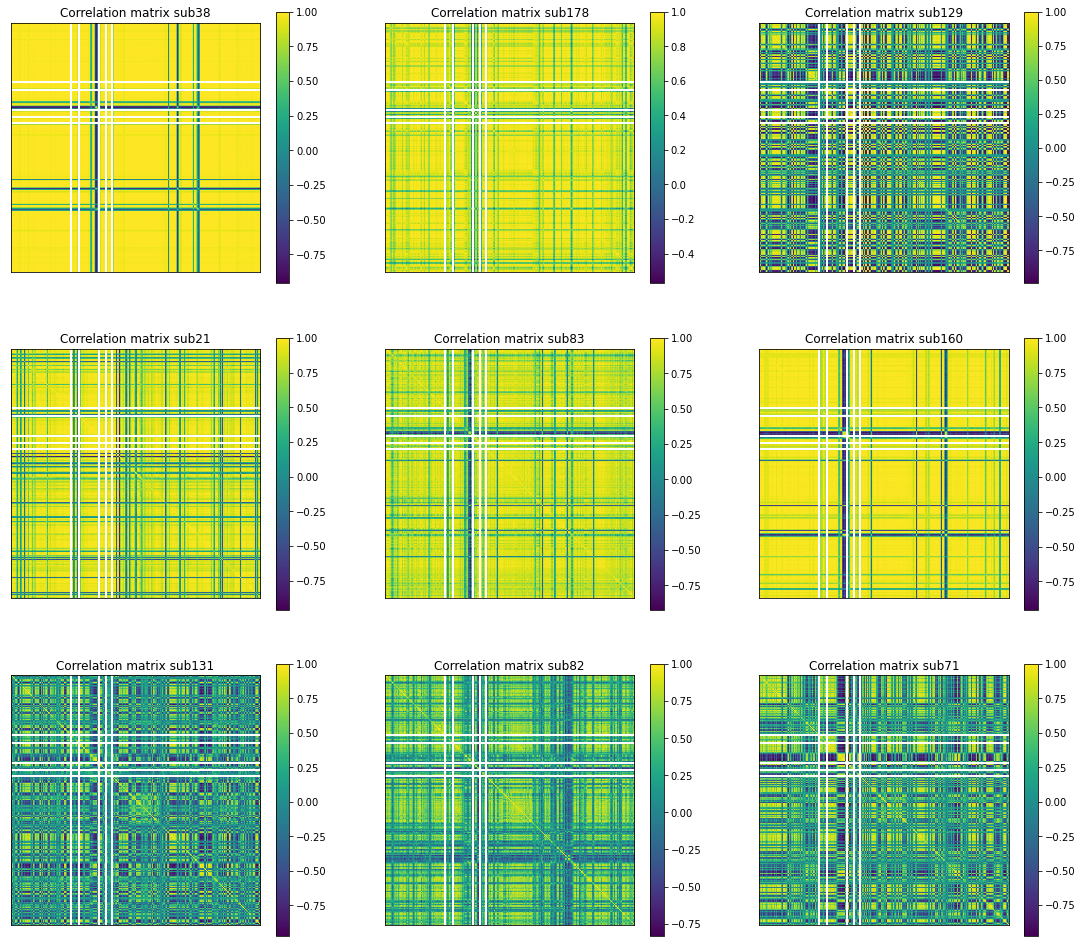

In [29]:
# Correlation matrix of few patients 

plt.figure(figsize=(19,17))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(correlation_mat[:,:,i])
    plt.title('Correlation matrix ' +str(GSR_name[i]))
    plt.colorbar()
    plt.xticks(())
    plt.yticks(())
plt.show()

## 3. Feature Extraction ##
At the next section, we will create the features for the model. \
Each feature represented by another coefficient in the correlation matrix. \
Steps: 

I. Removing ROIs with uncertain system. \
II. Removing ROIs with unrelated system such as the sensory system. \
III. Extracting the upper triangle values to a flat vector. \
IV. Represent all data as a panda DataFrame. 

#### I. Removing ROIs with uncertain system ####
By the Power Atlas networks we know that the following ROIs have uncertain system: 

In [49]:
ROI_uncertain = np.arange(237, 265, 1, dtype=int)
ROI_uncertain = ROI_uncertain - 1  #to fit indexing starting from 0

correlation_mat_I = np.delete(correlation_mat,ROI_uncertain,0)
correlation_mat_I = np.delete(correlation_mat_I,ROI_uncertain,1)

print('The new correlation matrix shape is ' +str(correlation_mat_I.shape))

The new correlation matrix shape is (236, 236, 115)


#### II. Removing ROIs with unrelated system ####
By the Power Atlas networks we know that the following ROIs have systems that are not related to resting state.
We are assuming that those ROI will show no correlation as they are not used during resting state at all. 

For now, we will eliminate the Sensory systems' ROIs.

In [50]:
ROI_unrelated = np.arange(35) #from 0 to 34

correlation_mat_II = np.delete(correlation_mat_I,ROI_unrelated,0)
correlation_mat_II = np.delete(correlation_mat_II,ROI_unrelated,1)

print('The new correlation matrix shape is ' +str(correlation_mat_II.shape))

The new correlation matrix shape is (201, 201, 115)


#### III. Extract the upper triangle values to a flat vector
The coeeficient matrix is a symmetric matrix, thus we can remove half of the coefficients in the matrix. \
Furthermore, in order to extract features we want our coefficients to be in a flat vector. 

In [54]:
correlation_vec = correlation_mat_II[np.triu_indices(correlation_mat_II.shape[0])]
correlation_vec = np.transpose(correlation_vec)
correlation_vec.shape

(115, 20301)

#### IV. Represent all data as a panda DataFrame 

In [56]:
data = pd.DataFrame(correlation_vec, index = GSR_name)
data

,0,1,2,3,4,5,6,7,8,9,...,20291,20292,20293,20294,20295,20296,20297,20298,20299,20300
sub38,1.0,0.998591,0.994708,0.994391,0.998787,0.997253,0.965091,0.998128,0.997534,0.997466,...,1.0,0.989605,0.991765,0.993514,1.0,0.992070,0.992512,1.0,0.996455,1.0
sub178,1.0,0.993511,0.929140,0.820139,0.994014,0.967144,0.739384,0.995687,0.969694,0.968359,...,1.0,0.946664,0.939068,0.966181,1.0,0.887105,0.906860,1.0,0.939787,1.0
sub129,1.0,-0.851064,0.934798,0.923168,-0.028400,0.904091,0.895576,0.944164,-0.400823,0.912003,...,1.0,0.939337,0.677583,-0.141731,1.0,0.694010,-0.322668,1.0,0.141863,1.0
sub21,1.0,0.947610,0.943865,0.396449,0.981154,0.952597,0.816135,0.987248,0.968123,0.938743,...,1.0,0.809132,0.730121,0.826406,1.0,0.815111,0.866271,1.0,0.865041,1.0
sub83,1.0,0.850567,0.888262,0.788419,0.841887,0.839219,0.844419,0.869759,0.850953,0.840064,...,1.0,0.892892,0.875748,0.902539,1.0,0.862787,0.934894,1.0,0.850793,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub58,1.0,0.993322,0.982163,0.906777,0.990552,0.988794,0.783690,0.990710,0.974338,0.976666,...,1.0,0.987220,0.968355,0.968443,1.0,0.962423,0.953992,1.0,0.979988,1.0
sub10,1.0,0.996117,0.995003,0.919383,0.998309,0.994699,0.950028,0.998320,0.995687,0.993568,...,1.0,0.994527,0.991007,0.992913,1.0,0.986487,0.991039,1.0,0.991180,1.0
sub41,1.0,0.648668,0.688250,0.423301,0.784596,0.708067,0.548437,0.811365,0.782705,-0.013200,...,1.0,0.052838,0.563971,0.642204,1.0,-0.281513,-0.440082,1.0,0.776614,1.0
sub151,1.0,0.795275,0.768852,-0.177306,0.920736,0.603296,0.279776,0.929479,0.835423,0.391095,...,1.0,0.826869,0.523609,0.647317,1.0,0.496129,0.543738,1.0,0.660589,1.0
